### Wstęp do Uczenia Maszynowego 
##### Laboratorium 1

### 0. Sprawy organizacyjne

Kontakt: MS Teams, anna.kozak@pw.edu.pl

Pracujemy z repozytorium GitHub: https://github.com/kozaka93/2024Z-MachineLearning

Zasady zaliczenia:
- 3 x praca domowa (3 x 15p)
- projekt (35p)

Aby zaliczyć laboratoria, należy uzyskać ponad 40 punktów ogółem, w tym co najmniej 15 punktów z projektu.

### 1. Podstawy drzew decyzyjnych 

1.1 Pakiety i dane

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

sns.set(style='darkgrid', palette='muted')

import warnings
warnings.filterwarnings('ignore')

Rozważmy zbiór danych zawierający informacje o zarobkach zawodników Baseballu.

In [2]:
# Zbiory danych można wczytać przez link z GitHub, nie ma koniecznośći ich pobierania.
Hitters = pd.read_csv('Hitters.csv', index_col=0)

In [3]:
Hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


##### *Zadanie 1*
-------------------
Przygotuj zbiór danych do zbudowania pierwszego modelu.

a) Utwórz zbiór *Hitters_small* zawierający zmienne o nazwach *Years, Hits, Salary*.

b) Przyjrzyj się utworzonemu zbiorowi danych. Jaki jest wymiar danych, typy zmiennych, czy są braki danych? Jakie rozkłady mają zmienne?

c) Podziel zbiór danych na X = ['Years', 'Hits'] i y = ['Salary']. Dokonaj transformacji zmiennej y jako log(y).

d) Podziel dane na zbiór treningowy i testowy (proporcja 50:50).



In [4]:
# a)
Hitters_small = Hitters[['Years', 'Hits', 'Salary']]
Hitters_small.head()

,Years,Hits,Salary
0,1,66,NaN
1,14,81,475.0
2,3,130,480.0
3,11,141,500.0
4,2,87,91.5


In [5]:
# b)
Hitters_small.shape

(322, 3)

In [6]:
Hitters_small.describe()

,Years,Hits,Salary
count,322.000000,322.000000,263.000000
mean,7.444099,101.024845,535.925882
std,4.926087,46.454741,451.118681
min,1.000000,1.000000,67.500000
25%,4.000000,64.000000,190.000000
50%,6.000000,96.000000,425.000000
75%,11.000000,137.000000,750.000000
max,24.000000,238.000000,2460.000000


In [7]:
Hitters_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, 0 to 321
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Years   322 non-null    int64  
 1   Hits    322 non-null    int64  
 2   Salary  263 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 10.1 KB


In [8]:
Hitters_small = Hitters_small.dropna()
Hitters_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Years   263 non-null    int64  
 1   Hits    263 non-null    int64  
 2   Salary  263 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 8.2 KB


array([[<Axes: title={'center': 'Years'}>,
        <Axes: title={'center': 'Hits'}>],
       [<Axes: title={'center': 'Salary'}>, <Axes: >]], dtype=object)

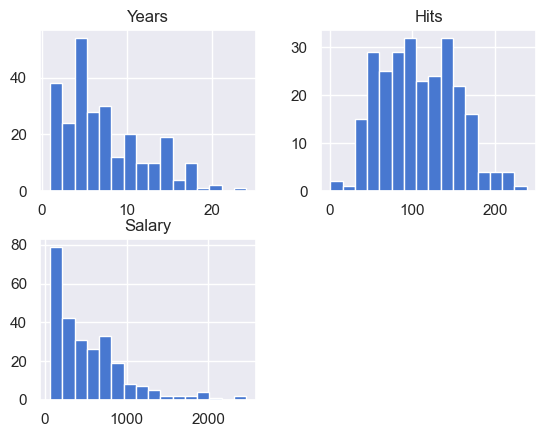

In [9]:
Hitters_small.hist(bins=16)

array([[<Axes: title={'center': 'Var1'}>,
        <Axes: title={'center': 'Var2'}>],
       [<Axes: title={'center': 'log(Var1)'}>,
        <Axes: title={'center': 'log(Var2)'}>]], dtype=object)

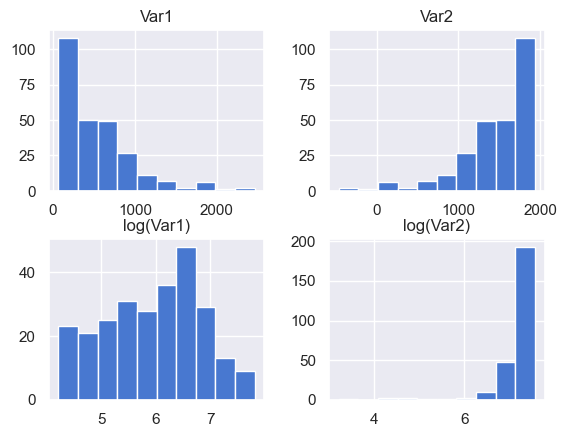

In [10]:
## Eksperyment - transformacja log zmiennych skośnych

experiment = pd.DataFrame({"Var1" : Hitters.Salary,
                           "Var2": (-Hitters.Salary) + 2000})

experiment["log(Var1)"] = np.log(experiment.Var1)
experiment["log(Var2)"] = np.log(experiment.Var2)

experiment.hist()

In [11]:
# c)
X = Hitters_small[['Years', 'Hits']]
y = np.log(Hitters_small['Salary'])

In [12]:
# d)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

##### 1.2 Model drzewa - zadanie regresji


#### *Jak się buduje drzewa?*
1. Dzielimy przestrzeń $X = (X_1, X_2, \dots, X_p)$ na $J$ regionów $R_1, R_2, \dots, R_J$.
2. Predykcja w $j$-ty regionie jest równa średniej z wartości obserwacji $y$ zbioru treningowego w regione $R_J$. 

In [13]:
Tree = tree.DecisionTreeRegressor()
Tree = Tree.fit(X_train, y_train)

Rysunek drzewa

[Text(0.5079326923076923, 0.96875, 'x[0] <= 5.5\nsquared_error = 0.803\nsamples = 131\nvalue = 5.962'),
 Text(0.2778846153846154, 0.90625, 'x[1] <= 113.5\nsquared_error = 0.556\nsamples = 59\nvalue = 5.325'),
 Text(0.15913461538461537, 0.84375, 'x[1] <= 20.5\nsquared_error = 0.457\nsamples = 37\nvalue = 5.046'),
 Text(0.15144230769230768, 0.78125, 'squared_error = 0.0\nsamples = 1\nvalue = 7.663'),
 Text(0.16682692307692307, 0.78125, 'x[0] <= 3.5\nsquared_error = 0.275\nsamples = 36\nvalue = 4.973'),
 Text(0.08461538461538462, 0.71875, 'x[0] <= 2.5\nsquared_error = 0.076\nsamples = 20\nvalue = 4.678'),
 Text(0.046153846153846156, 0.65625, 'x[1] <= 80.0\nsquared_error = 0.024\nsamples = 12\nvalue = 4.546'),
 Text(0.015384615384615385, 0.59375, 'x[1] <= 47.0\nsquared_error = 0.02\nsamples = 4\nvalue = 4.388'),
 Text(0.007692307692307693, 0.53125, 'squared_error = 0.0\nsamples = 1\nvalue = 4.554'),
 Text(0.023076923076923078, 0.53125, 'x[1] <= 54.5\nsquared_error = 0.014\nsamples = 3\nval

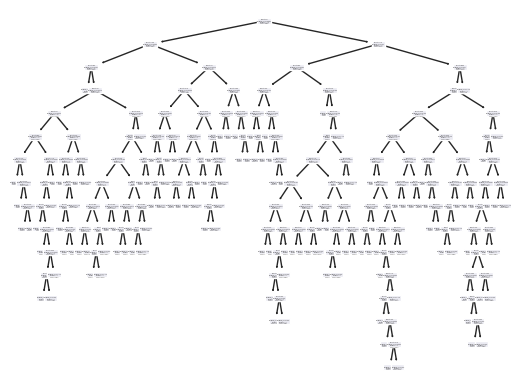

In [14]:
tree.plot_tree(Tree)

Przejrzysty zapis otrzymanego drzewa

In [15]:
from sklearn.tree import export_text
t = export_text(Tree)
print(t)

|--- feature_0 <= 5.50
|   |--- feature_1 <= 113.50
|   |   |--- feature_1 <= 20.50
|   |   |   |--- value: [7.66]
|   |   |--- feature_1 >  20.50
|   |   |   |--- feature_0 <= 3.50
|   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |--- feature_1 <= 80.00
|   |   |   |   |   |   |--- feature_1 <= 47.00
|   |   |   |   |   |   |   |--- value: [4.55]
|   |   |   |   |   |   |--- feature_1 >  47.00
|   |   |   |   |   |   |   |--- feature_1 <= 54.50
|   |   |   |   |   |   |   |   |--- value: [4.25]
|   |   |   |   |   |   |   |--- feature_1 >  54.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 67.00
|   |   |   |   |   |   |   |   |   |--- value: [4.50]
|   |   |   |   |   |   |   |   |--- feature_1 >  67.00
|   |   |   |   |   |   |   |   |   |--- value: [4.25]
|   |   |   |   |   |--- feature_1 >  80.00
|   |   |   |   |   |   |--- feature_1 <= 111.00
|   |   |   |   |   |   |   |--- feature_1 <= 106.00
|   |   |   |   |   |   |   |   |--- feature_1 <= 86.50
|   |   |   |

##### Drzewo o trzech liściach
Poprzez wskazywanie hiperparametrów możemy manipulować skompliowaniem i jakością modelu drzewa.
Zbudujmy drzewo o hiperparametrze `max_leaf_nodes` = 3.

In [16]:
Tree3 = tree.DecisionTreeRegressor(max_leaf_nodes=3)
Tree3 = Tree3.fit(X_train, y_train)

[Text(0.4, 0.8333333333333334, 'Years <= 5.5\nsquared_error = 0.803\nsamples = 131\nvalue = 5.962'),
 Text(0.2, 0.5, 'squared_error = 0.556\nsamples = 59\nvalue = 5.325'),
 Text(0.6, 0.5, 'Hits <= 111.0\nsquared_error = 0.4\nsamples = 72\nvalue = 6.484'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.263\nsamples = 30\nvalue = 6.093'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.31\nsamples = 42\nvalue = 6.763')]

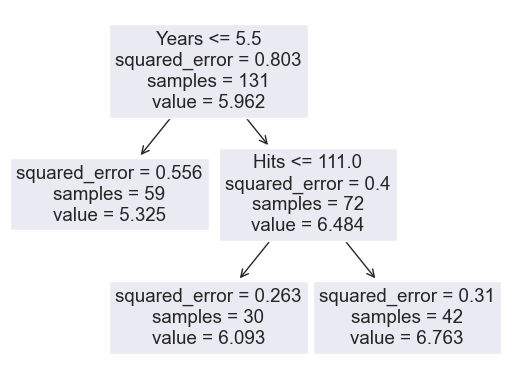

In [17]:
tree.plot_tree(Tree3, feature_names=Tree3.feature_names_in_.tolist())

### Regiony 

<img src="Five-Region-Examples.png" alt="drawing" width="400"/>

###### Źródło:  James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python, Springer Science+Business Media, New York. https://www.statlearning.com/

#### *Zadanie 2*
-------------------
Na podstawie informacji o utworzonym drzewie zdefiniuj regiony $R_1, R_2, R_3$.

##### *Zadanie 3*
-------------------


Na bazie przedstawionych poniżej regionów narysuj odpowiadające im drzewo decyzyjne.

<img src="Regions_Task.png" alt="drawing" width="400"/>


#### Jak konstruować regiony w przypadku drzewa dla zadania regresji?
**Cel**: Znaleźć $R_1, R_2, \dots, R_J$, które minimalizują $RSS$.

$$RSS = \sum_{j = 1}^{J} \sum_{i \in R_j}^{}(y_i - \hat{y}_{R_j})^2$$

Niestety nie jesteśmy w stanie rozpatrzeć wszystkich możliwości - zbyt złożone obliczeniowo.

Używamy podejścia *top-down, greedy*:
- *top-down* - zaczynamy od wszystkich obserwacji w jednym regione i następnie w kolejnych krokach rozdzielamy na mniejsze regiony
- *greedy* - na każdym etapie procesu budowania drzewa dokonywany jest najlepszy podział, nie patrzymy w przyszłość

Proces powatrzamy do momentu spełnienia kryterium stopu, np. w liściu nie może być mniej niż 5 obserwacji.



#### 1.3 Predykcja

Dla $R_1, R_2, R_3$: 

In [18]:
print('R1:', np.exp(5.325)*1000)
print('R2:', np.exp(6.093)*1000)
print('R3:', np.exp(6.763)*1000)

R1: 205408.36046478315
R2: 442747.6637636458
R3: 865234.0081512888


In [19]:
y_pred_test = Tree3.predict(X_test)

#### 1.4 Jak dobry jest nasz model (zadanie regresji)?

Błąd średniokwadratowy:

$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{f}(x_i))^2$,

gdzie:

$y_i$ - wartość prawdziwa dla $i$-tej obserwacji,

$\hat{f}(x_i)$ jest predykcją modelu dla $i$-tej obserwacji.


In [20]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(np.exp(y_test)*1000, np.exp(y_pred_test)*1000))

348118.1465736779

Ocena graficzna

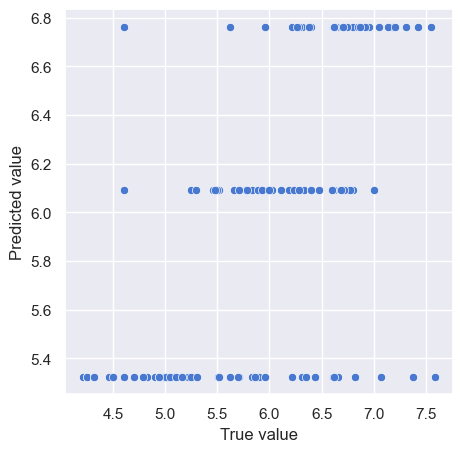

In [21]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.xlabel("True value")
plt.ylabel("Predicted value")
plt.show()

#### 1.5 Wpływ parametrów na jakość modelu

#### *Zadanie 4*
-------------------

Przeprowadź eksperyment pokazujący wartość miary MSE na zbiorze treningowym i testowym w zależności od wartości parametru `max_leaf_nodes` - zakres 2:30.

`max_leaf_nodes` - Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes (default=None).

Narysuj wykres przedstawiający wyniki eksperymantu. Jaka jest optymalna wartość parametru `max_leaf_nodes`?

In [26]:
mse_train = []
mse_test = []

for i in range(2,31):
    model = tree.DecisionTreeRegressor(max_leaf_nodes=i)
    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    mse_train.append(mean_squared_error(y_train, y_pred_train))
    mse_test.append(mean_squared_error(y_test, y_pred_test))

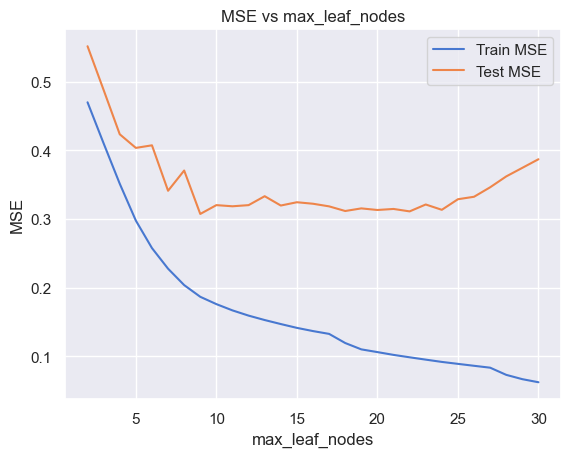

In [27]:
plt.figure()
plt.plot(range(2,31), mse_train)
plt.plot(range(2,31), mse_test)
plt.title("MSE vs max_leaf_nodes")
plt.xlabel("max_leaf_nodes")
plt.ylabel("MSE")
plt.legend(['Train MSE', 'Test MSE'])
plt.show()